In [34]:
train <- read.csv("data/train.csv", header = TRUE)
test <- read.csv("data/test.csv", header = TRUE)

In [35]:
test.survived <- data.frame(Survived = rep("None", nrow(test)), test[,])

In [36]:
data.combined <- rbind(train, test.survived)

In [37]:
str(data.combined)

'data.frame':	1309 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : chr  "0" "1" "1" "1" ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 1307 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 559 520 629 417 581 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 929 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 187 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


In [38]:
data.combined$Pclass <- as.factor(data.combined$Pclass)
data.combined$Survived <- as.factor(data.combined$Survived)

In [39]:
table(data.combined$Survived)


   0    1 None 
 549  342  418 

In [40]:
table(data.combined$Pclass)


  1   2   3 
323 277 709 

In [41]:
train$Pclass <- as.factor(train$Pclass)
str(train$Pclass)

 Factor w/ 3 levels "1","2","3": 3 1 3 1 3 3 1 3 3 2 ...


In [42]:
library("ggplot2")

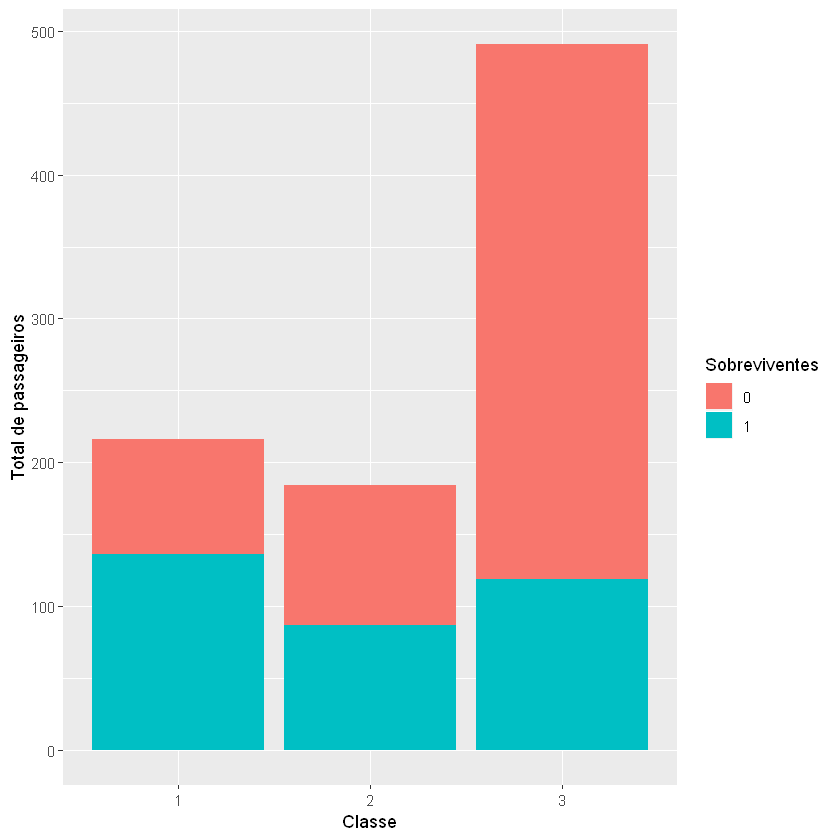

In [43]:
ggplot(train, aes(x = Pclass, fill = factor(Survived))) +
  geom_bar(width = 0.9) +
  xlab("Classe") +
  ylab("Total de passageiros") +
  labs(fill = "Sobreviventes")

In [44]:
head(as.character(train$Name))

[1] "Braund, Mr. Owen Harris"                            
[2] "Cumings, Mrs. John Bradley (Florence Briggs Thayer)"
[3] "Heikkinen, Miss. Laina"                             
[4] "Futrelle, Mrs. Jacques Heath (Lily May Peel)"       
[5] "Allen, Mr. William Henry"                           
[6] "Moran, Mr. James"

In [45]:
length(as.character(data.combined$Name))

[1] 1309

In [46]:
length(unique(as.character(data.combined$Name)))

[1] 1307

In [47]:
dup.names <- as.character(data.combined[which(duplicated(as.character(data.combined$Name))), "Name"])
data.combined[which(data.combined$Name %in% dup.names),]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
290,290,1,3,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.7500,,Q
697,697,0,3,"Kelly, Mr. James",male,44.0,0,0,363592,8.0500,,S
892,892,None,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q
898,898,None,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,,Q


In [48]:
library("stringr")

In [49]:
misses <- data.combined[which(str_detect(data.combined$Name, "Miss.")), ]

In [50]:
misses[1:10,]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
11,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7000,G6,S
12,12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.5500,C103,S
15,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14,0,0,350406,7.8542,,S
23,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15,0,0,330923,8.0292,,Q
25,25,0,3,"Palsson, Miss. Torborg Danira",female,8,3,1,349909,21.0750,,S
29,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NA,0,0,330959,7.8792,,Q
33,33,1,3,"Glynn, Miss. Mary Agatha",female,NA,0,0,335677,7.7500,,Q
39,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18,2,0,345764,18.0000,,S
40,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14,1,0,2651,11.2417,,C


In [51]:
mrses <- data.combined[which(str_detect(data.combined$Name, "Mrs.")), ]

In [52]:
mrses[1:10,]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
9,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S
10,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C
16,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55,0,0,248706,16.0000,,S
19,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)",female,31,1,0,345763,18.0000,,S
20,20,1,3,"Masselmani, Mrs. Fatima",female,NA,0,0,2649,7.2250,,C
26,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)",female,38,1,5,347077,31.3875,,S
32,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NA,1,0,PC 17569,146.5208,B78,C
41,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40,1,0,7546,9.4750,,S


In [53]:
males <- data.combined[which(data.combined$Sex == 'male'),]

In [54]:
males[1:10,]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
13,13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S
14,14,0,3,"Andersson, Mr. Anders Johan",male,39,1,5,347082,31.2750,,S
17,17,0,3,"Rice, Master. Eugene",male,2,4,1,382652,29.1250,,Q
18,18,1,2,"Williams, Mr. Charles Eugene",male,NA,0,0,244373,13.0000,,S
21,21,0,2,"Fynney, Mr. Joseph J",male,35,0,0,239865,26.0000,,S
